**Digit classification using a CNN feature extraction and an ANN for classification**

**Author**: Chiron Bang

**Contact:** [Twitter](https://twitter.com/chiron_bang), [Email](mailto:chironbang@gmail.com) (Don't hesitate to reach out may you have any question or comment ;) \) 

**Date created**: 12/05/2021

**Last modified**: 05/01/2022

**Ressources used for the following code**


*   https://www.codeproject.com/Articles/5278503/Making-TensorFlow-Models-Portable-Using-ONNX
*   https://learning.oreilly.com/library/view/deep-learning-with/9781617294433/OEBPS/Text/05.xhtml 
* Chap. 5, Deep Learning with Python by François Chollet.


In [ ]:
import tensorflow as tf
import os
import random as rd
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

<h2>Loading and preprocessing data</h2>

In [ ]:
!mkdir weights
!wget https://github.com/chiron-bang/Computer-Vision/blob/main/digit-recognition/data.zip?raw=true
!mv data.zip?raw=true data.zip
!unzip data

Streaming output truncated to the last 5000 lines.
 extracting: training/9/59566.png    
 extracting: training/9/33597.png    
 extracting: training/9/45345.png    
 extracting: training/9/35677.png    
 extracting: training/9/26703.png    
 extracting: training/9/42851.png    
 extracting: training/9/58859.png    
 extracting: training/9/6813.png     
 extracting: training/9/51910.png    
 extracting: training/9/53723.png    
 extracting: training/9/7200.png     
 extracting: training/9/19971.png    
 extracting: training/9/35556.png    
 extracting: training/9/50515.png    
 extracting: training/9/1811.png     
 extracting: training/9/38747.png    
 extracting: training/9/6061.png     
 extracting: training/9/56431.png    
 extracting: training/9/55850.png    
 extracting: training/9/31057.png    
 extracting: training/9/59362.png    
 extracting: training/9/14365.png    
 extracting: training/9/34013.png    
 extracting: training/9/24999.png    
 extracting: training/9/15354.png    

In [ ]:
IMAGE_DIR = 'training/'
dir_list = os.listdir(IMAGE_DIR)
X,y = [], []

In [ ]:
for dir_name in dir_list:
    file_names = os.listdir(IMAGE_DIR + dir_name)
    for file_name in file_names:
        img = cv.imread(IMAGE_DIR + dir_name + "/" + file_name, cv.IMREAD_GRAYSCALE)
        #img.astype('float') look into it later
        X.append(img)
        y.append(int(dir_name))




<h3>Shuffling and scaling images</h3>

In [ ]:
indexes = list(range(len(X)))
rd.shuffle(indexes)

X = np.array(X,dtype='float')
X = np.expand_dims(X, axis=3)

y = tf.keras.utils.to_categorical(y, num_classes=10)
y = np.array(y)
X /= 255.
X,y = X[indexes], y[indexes]

In [ ]:
print(y.shape)
print(y[0])

(60000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


<h3>Splitting dataset</h3>

In [ ]:
train_split, val_split = .9, 0.07
n_train = int(train_split * len(X))
n_val = int(val_split * len(X))
X_train, y_train = X[:n_train], y[:n_train]
X_val, y_val = X[n_train:n_train + n_val], y[n_train:n_train + n_val]
X_test, y_test = X[n_train + n_val:], y[n_train + n_val:]

In [ ]:
print("Shape X_train: ", X_train.shape)
print("Shape X_val: ", X_val.shape)
print("Shape X_test: ", X_test.shape)

Shape X_train:  (54000, 28, 28, 1)
Shape X_val:  (4200, 28, 28, 1)
Shape X_test:  (1800, 28, 28, 1)


<h2>Defining the model</h2>

In [ ]:
def model_create(input_shape):
    model = tf.keras.Sequential(name='nn_model')
    
    

    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu', padding='valid'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu', padding='valid'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(tf.keras.layers.Conv2D(64, 3, activation='relu', padding='valid'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))

    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.SGD(1e-2), loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')
    model.build(input_shape)
    
    model.summary()
    return model

In [ ]:
my_model = model_create((None,28,28,1))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Model: "nn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0  

In [ ]:
history = my_model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val,y_val), validation_batch_size=64)
my_model.save('weights/model')

Epoch 1/50
844/844 [==============================] - 20s 10ms/step - loss: 0.4231 - accuracy: 0.1039 - val_loss: 0.3267 - val_accuracy: 0.1795
Epoch 2/50
844/844 [==============================] - 8s 9ms/step - loss: 0.3301 - accuracy: 0.1184 - val_loss: 0.3241 - val_accuracy: 0.2443
Epoch 3/50
844/844 [==============================] - 8s 10ms/step - loss: 0.3271 - accuracy: 0.1462 - val_loss: 0.3208 - val_accuracy: 0.3043
Epoch 4/50
844/844 [==============================] - 8s 10ms/step - loss: 0.3225 - accuracy: 0.1976 - val_loss: 0.3143 - val_accuracy: 0.3907
Epoch 5/50
844/844 [==============================] - 8s 10ms/step - loss: 0.3123 - accuracy: 0.2801 - val_loss: 0.2939 - val_accuracy: 0.4405
Epoch 6/50
844/844 [==============================] - 8s 10ms/step - loss: 0.2841 - accuracy: 0.3706 - val_loss: 0.2507 - val_accuracy: 0.5162
Epoch 7/50
844/844 [==============================] - 9s 11ms/step - loss: 0.2397 - accuracy: 0.4862 - val_loss: 0.2013 - val_accuracy: 0.6152

<h2>Plotting accuracy and loss</h2>

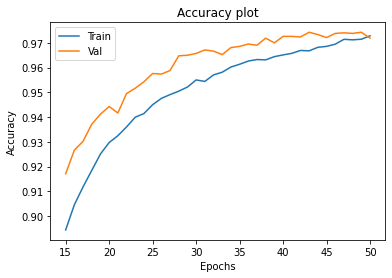

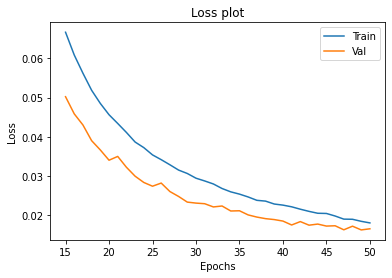

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(range(15, len(acc) + 1), acc[14:])
plt.plot(range(15, len(val_acc) + 1), val_acc[14:])
plt.legend(['Train', 'Val'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Accuracy plot')
plt.show()

plt.figure()

plt.plot(range(15, len(loss) + 1), loss[14:])
plt.plot(range(15, len(val_loss) + 1), val_loss[14:])
plt.legend(['Train', 'Val'])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title('Loss plot')
plt.show()

In [ ]:
# Evaluating the trained model
my_model.evaluate(X_test, y_test)

57/57 [==============================] - 0s 5ms/step - loss: 0.0157 - accuracy: 0.9767


[0.015736674889922142, 0.9766666889190674]

In [ ]:
# Command used to convert to a portable format which can be used with opencv for inference
!pip install  tf2onnx
!python3 -m tf2onnx.convert --saved-model "weights/model" --output "weights/cnn_model.onnx"

     |████████████████████████████████| 435 kB 5.5 MB/s 
     |████████████████████████████████| 12.8 MB 40.3 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-05-01 19:04:41,175 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-05-01 19:04:41,740 - INFO - Signatures found in model: [serving_default].
2022-05-01 19:04:41,741 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-05-01 19:04:41,741 - INFO - Output names: ['dense_4']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-05-01 19:04:41,882 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py:706: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-05-01 19:04:41,921 - INFO - Using ten

In [ ]:
!ls weights

cnn_model.onnx	model


In [ ]:
# Loading the model in the onnx format 
loaded_model = cv.dnn.readNetFromONNX('weights/cnn_model.onnx')

Let's check out the model output.

In [ ]:
loaded_model.setInput(X[0])

In [ ]:
y_0 = loaded_model.forward()

In [ ]:
print("Probabilities predicted\n", y_0)

Probabilities predicted
 [[1.6877358e-10 2.2452941e-06 9.9999702e-01 1.1790549e-08 8.0041584e-10
  1.1762959e-09 2.5636888e-09 3.8472173e-08 7.1490393e-07 4.8005605e-10]]


In [ ]:
print("The digit predicted is", np.argmax(y_0))

The digit predicted is 2


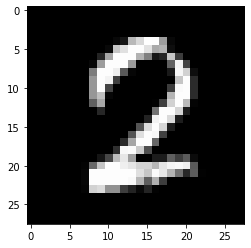

In [ ]:
# Verifying the prediction
plt.imshow(X[0][...,0], cmap="gray")

In [ ]:
X[0].shape

(28, 28, 1)